In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
from statistics import median
from statistics import mean
import cv2
from numpy import bitwise_xor

In [6]:
loc1 = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW2/inputs/P4/frame_1.png'
loc2 = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW2/inputs/P4/frame_2.png'
im1 = Image.open(loc1)
im2 = Image.open(loc2)
img1 = np.array(im1)
img2 = np.array(im2)

In [7]:
def bitplane_slice(image):
  image = np.array(image.convert('L'))
  planes = []
  for i in range(8):
    planes.append([])
    for pix in image:
      planes[i].append((pix//(2**i))%2)
    planes[i] = np.array(planes[i])
    planes[i] = planes[i].reshape(image.shape)
  return planes

In [8]:
planes1 = bitplane_slice(im1)
planes2 = bitplane_slice(im2)

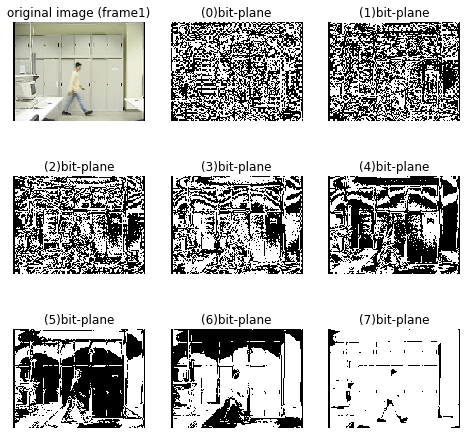

In [24]:
plt.subplot(3,3,1)
plt.imshow(im1,'gray')
plt.title('original image (frame1)')
plt.axis('off')
for i in range(8):
    matplotlib.rcParams['figure.figsize'] = [8,8]
    plt.subplot(3,3,i+2)
    plt.imshow(planes1[i],'gray')
    plt.title('({})bit-plane'.format(i))
    plt.axis('off')

In [9]:
frames_xor = []
for i in range(8):
    frames_xor.append(bitwise_xor(planes1[i],planes2[i]))

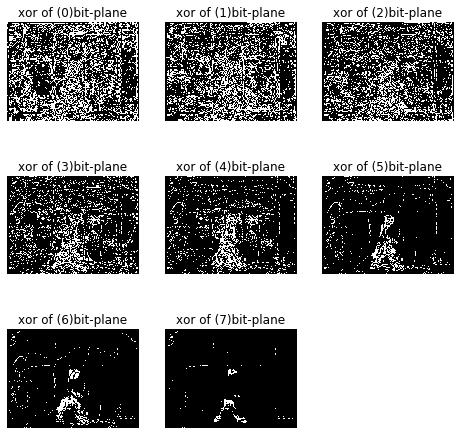

In [31]:
for i in range(8):
    matplotlib.rcParams['figure.figsize'] = [8,8]
    plt.subplot(3,3,i+1)
    plt.imshow(frames_xor[i],'gray')
    plt.title('xor of ({})bit-plane'.format(i))
    plt.axis('off')

In [10]:
sum_xor_planes = np.zeros(frames_xor[7].shape)
for i in range(4):
    sum_xor_planes += (frames_xor[i+4]) * 2**(i+4)

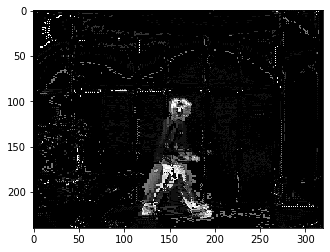

In [10]:
plt.imshow(sum_xor_planes,'gray')

In [13]:
def median_filter(image,filter_size):
    filtered_image = np.zeros(list(image.shape))
    x,y = image.shape
    for i in range(x):
        for j in range(y):
            filtered_image[i,j] = pix_med_filter([i,j], image, filter_size)
    fil_size = filter_size
    return(filtered_image, fil_size)

def pix_med_filter(pixelcoor, image2, filtershape):
    size = list(range(-filtershape//2+1,filtershape//2+1))
    a, b = pixelcoor
    z, w = image2.shape
    neigh_pixs = []
    for col in size:
        for row in size:
            if 0 <= a + row < z and 0 <= b + col < w:
                neigh_pixs.append(image2[a+row,b+col])
    out_pixel = median(neigh_pixs)
    return out_pixel

In [29]:
sum_xor_planes = np.array(sum_xor_planes, dtype = int)
filtered_sum,s = median_filter(sum_xor_planes,7)

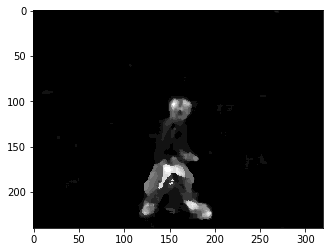

In [30]:
plt.imshow(filtered_sum,'gray')